<a href="https://colab.research.google.com/github/RinadAkel/Convolutions-and-Pooling/blob/main/Final_MalwareProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRIDICTION MALWARE TYPE** <br>
---

**Objective:** The aim is to explore the dataset and try to classify the data to know the type of malware.

**SOME EXPLANATION TO BETTER UNDERSTAND THE DATASET:**

***Misc Virtual Size:*** This field specifies the virtual size of the section. The virtual size is the amount of space that the section occupies in virtual memory.<br>
***Virtual Address:*** This field specifies the virtual address of the section. The virtual address is the address that the section will be loaded into memory at runtime.<br>
***Size Of raw data:*** This field specifies the size of the raw data in the section. The raw data is the actual data that is stored in the section.<br>
***Pointer to raw data:*** This field specifies the offset of the raw data from the start of the section.<br>
***Pointer to relocations:*** This field specifies the offset of the relocation table from the start of the section. The relocation table is a table that contains information about how to relocate the section when it is loaded into memory.<br>
***Pointer to line numbers:*** This field specifies the offset of the line number table from the start of the section. The line number table is a table that contains information about which lines of source code correspond to which bytes in the section.<br>
***Number of relocations:*** This field specifies the number of relocations in the relocation table.<br>
***Characteristics:*** This field specifies the characteristics of the section. The characteristics are a set of flags that indicate how the section should be treated by the operating system.<br>

# ***PREFIXES USED IN THE NAMING OF THE FEATURES:***

 **Data:** The section contains initialized data.<br>
***Text:***	The section contains executable code.<br>
***Rdata:***	The section contains read-only data.<br>
***Bss:*** The section contains uninitialized data.<br>
***Idata:***	The section contains initialized data that is imported from other modules. <br>
***Edata:***	Marks the end of the data segment. <br>
***Rsrc:***	Contains resources, such as icons, cursors, and bitmaps.<br>
***Reloc:***	Contains relocation information, which is used by the linker to resolve addresses in the binary file to their actual addresses in memory. <br>
***Tls:***	Contains thread local storage (TLS) data. TLS data is data that is specific to a particular thread of execution.<br>

**Importing the necessary python libraries:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, TimeDistributed, SimpleRNN
from keras.utils import np_utils, to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import backend as K
from keras.utils.vis_utils import plot_model

**Cloning the data from github:**

In [ ]:
!git clone https://github.com/RinadAkel/Dataset
%cd Dataset

Cloning into 'Dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 1.47 MiB | 1.64 MiB/s, done.
/content/Dataset/Dataset/Dataset/Dataset/Dataset/Dataset


**Reading the data:**

In [ ]:
df = pd.read_csv('PE Sections.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18546 entries, 0 to 18545
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SHA256                      18546 non-null  object
 1   Malware_Type                18546 non-null  object
 2   text_Misc_VirtualSize       18546 non-null  int64 
 3   text_VirtualAddress         18546 non-null  int64 
 4   text_SizeOfRawData          18546 non-null  int64 
 5   text_PointerToRawData       18546 non-null  int64 
 6   text_PointerToRelocations   18546 non-null  int64 
 7   text_PointerToLinenumbers   18546 non-null  int64 
 8   text_NumberOfRelocations    18546 non-null  int64 
 9   text_NumberOfLinenumbers    18546 non-null  int64 
 10  text_Characteristics        18546 non-null  int64 
 11  data_Misc_VirtualSize       18546 non-null  int64 
 12  data_VirtualAddress         18546 non-null  int64 
 13  data_SizeOfRawData          18546 non-null  in

In [ ]:
df.describe()

text_Misc_VirtualSize  text_VirtualAddress  text_SizeOfRawData  \
count           1.854600e+04         1.854600e+04        1.854600e+04   
mean            4.414369e+05         1.027691e+04        4.304867e+05   
std             9.087257e+05         6.352284e+04        8.187547e+05   
min             0.000000e+00         0.000000e+00        0.000000e+00   
25%             4.395600e+04         4.096000e+03        4.044800e+04   
50%             2.534920e+05         4.096000e+03        2.467840e+05   
75%             6.380110e+05         8.192000e+03        6.327040e+05   
max             3.884237e+07         4.751360e+06        3.775846e+07   

       text_PointerToRawData  text_PointerToRelocations  \
count           1.854600e+04               1.854600e+04   
mean            4.973462e+03               9.461801e+05   
std             6.176622e+04               3.139290e+07   
min             0.000000e+00               0.000000e+00   
25%             5.120000e+02               0.000000e+00   
50%             1.024000e+03               0.000000e+00   
75%             1.024000e+03               0.000000e+00   
max             4.737024e+06               1.701935e+09   

       text_PointerToLinenumbers  text_NumberOfRelocations  \
count               1.854600e+04              18546.000000   
mean                3.010129e+03                  1.619972   
std                 4.061313e+05                220.613775   
min                 0.000000e+00                  0.000000   
25%                 0.000000e+00                  0.000000   
50%                 0.000000e+00                  0.000000   
75%                 0.000000e+00                  0.000000   
max                 5.530833e+07              30044.000000   

       text_NumberOfLinenumbers  text_Characteristics  data_Misc_VirtualSize  \
count              18546.000000          1.854600e+04           1.854600e+04   
mean                   0.285884          1.536933e+09           6.751921e+05   
std                   23.128362          4.458803e+08           4.233601e+06   
min                    0.000000          0.000000e+00           0.000000e+00   
25%                    0.000000          1.610613e+09           0.000000e+00   
50%                    0.000000          1.610613e+09           0.000000e+00   
75%                    0.000000          1.610613e+09           1.949200e+04   
max                 2142.000000          3.791651e+09           8.220948e+07   

       ...  tls_Characteristics  pdata_Misc_VirtualSize  pdata_VirtualAddress  \
count  ...         1.854600e+04            1.854600e+04          1.854600e+04   
mean   ...         2.782426e+08            2.198810e+03          7.808660e+04   
std    ...         9.053365e+08            1.619026e+04          5.847436e+05   
min    ...         0.000000e+00            0.000000e+00          0.000000e+00   
25%    ...         0.000000e+00            0.000000e+00          0.000000e+00   
50%    ...         0.000000e+00            0.000000e+00          0.000000e+00   
75%    ...         0.000000e+00            0.000000e+00          0.000000e+00   
max    ...         3.761242e+09            1.310720e+06          3.648307e+07   

       pdata_SizeOfRawData  pdata_PointerToRawData  \
count         1.854600e+04            1.854600e+04   
mean          2.131465e+03            6.653297e+04   
std           1.579855e+04            5.275907e+05   
min           0.000000e+00            0.000000e+00   
25%           0.000000e+00            0.000000e+00   
50%           0.000000e+00            0.000000e+00   
75%           0.000000e+00            0.000000e+00   
max           1.253376e+06            3.367629e+07   

       pdata_PointerToRelocations  pdata_PointerToLinenumbers  \
count                     18546.0                     18546.0   
mean                          0.0                         0.0   
std                           0.0                         0.0   
min                           0.0                         0.

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4675773603041406063, *['text_Misc_VirtualSize'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4675773603041406063, *['text_VirtualAddress'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4675773603041406063, *['text_SizeOfRawData'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4675773603041406063, *['text_PointerToRawData'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4675773603041406063, *['text_Misc_VirtualSize'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4675773603041406063, *['text_VirtualAddress'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4675773603041406063, *['text_SizeOfRawData'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4675773603041406063, *['text_PointerToRawData'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4675773603041406063 = autoviz.get_df('df_4675773603041406063')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4675773603041406063, *[[['text_Misc_VirtualSize', 'text_VirtualAddress'], ['text_VirtualAddress', 'text_SizeOfRawData'], ['text_SizeOfRawData', 'text_PointerToRawData'], ['text_PointerToRawData', 'text_PointerToRelocations']]], **{})
chart

In [ ]:
print(df.dtypes)

SHA256                        object
Malware_Type                  object
text_Misc_VirtualSize          int64
text_VirtualAddress            int64
text_SizeOfRawData             int64
                               ...  
pdata_PointerToRelocations     int64
pdata_PointerToLinenumbers     int64
pdata_NumberOfRelocations      int64
pdata_NumberOfLinenumbers      int64
pdata_Characteristics          int64
Length: 92, dtype: object


In [ ]:
df['Malware_Type'].unique()

array(['Spyware', 'Generic Malware', 'Ransomware', 'Downloader',
       'Backdoor'], dtype=object)

In [ ]:
count_per_malware_type = df['Malware_Type'].value_counts()

print(count_per_malware_type)

Generic Malware    6228
Spyware            5765
Downloader         2437
Ransomware         2376
Backdoor           1740
Name: Malware_Type, dtype: int64


**Taking a look at the first 25 rows of the dataset to have an overview of it:**

In [ ]:
df.head(25)

SHA256     Malware_Type  \
0   011af3a69ca68178ed40d746cb4f6b108b954290afb53d...          Spyware   
1   011bdb01c6863489c07befe11070e58a2a5b0feffd8be8...  Generic Malware   
2   e5a8176770ea11671eb417ac3f8b999b18b3d2e2be5557...  Generic Malware   
3   6500927c19e228cc116484a103ba594fdeadccf0615933...       Ransomware   
4   03aff1fde2776490687f40a87668e6e8f64d823af23a11...          Spyware   
5   04acadae995dfd792bd86557649837324e6879cd8d115f...  Generic Malware   
6   16779eb6a6c650a15a68c172865e395bca76689e531b32...  Generic Malware   
7   f6e37db1c23319551c031476021d4e252c89256c3b1b76...  Generic Malware   
8   0699ad9d2c1be04e5a335118cab7db196e912bba8b6f0c...  Generic Malware   
9   070acff10d21f37cdde50ee4fdb9e4859bc501d41ee20b...       Ransomware   
10  9248eb1725fb65d0241e09cd98e5acf528cc762db36d5c...  Generic Malware   
11  60b79dc70c0d21348e857a09934a5f4f498669a173f005...  Generic Malware   
12  4faf8723a640ac0f25ae8e2b8e0edc0e3934e017b50cb5...  Generic Malware   
13  38cf0d431b9a9df67632c37dce611a719b5a3b4b5bc2b4...  Generic Malware   
14  10b3074811eea87995499b84735bcbf1bc7d6d13393ee1...       Ransomware   
15  1146d3ccb59702104dadec96b6252f67a598f3fcc8e416...       Ransomware   
16  11d6dbe5acd0b8db0a0b9bdb4ffeac6da2a896de2ef7e5...       Downloader   
17  cc0b60c7808034e9e1803362dbf08dbc769a68300c32d8...       Ransomware   
18  c55a70b36ffc67d86e0a7be65f183e5998f1ab31b80b14...  Generic Malware   
19  145f571c145864a1e1ccac7dadfed7034e77d99a8bcff9...          Spyware   
20  26f0ffa6247c055c490ae60d93a9e284e96d821152afeb...       Ransomware   
21  163edda57b727333906617b366529adb1d27af8a853ab0...         Backdoor   
22  5fd8ce1ead90e9ef50055ee61b68b5b94858f8ca2478c8...  Generic Malware   
23  8a4e21250c7411e253d17ef56bd2ede874fd945fbeed79...  Generic Malware   
24  c5645e6459efc4abdddd08a27adfb222d5795403802a50...  Generic Malware   

    text_Misc_VirtualSize  text_VirtualAddress  text_SizeOfRawData  \
0                  724376                 4096              724480   
1                  890004                 8192              890368   
2                   16164                 8192               16384   
3                       0                    0                   0   
4                  205704                 4096              205824   
5                 1960220                 8192             1960448   
6                  877932                 8192              878080   
7                  974212                 8192              974336   
8                       0                    0                   0   
9                   53469                 4096               53760   
10                 838516                 8192              838656   
11                 915768                 8192              915968   
12                 864904                 8192              865280   
13                 506168                 8192              506368   
14                 179254                 4096              179712   
15                 151122                 4096              151552   
16                   6212                 8192                6656   
17                1396960                 8192             1397248   
18                 874724                 8192              875008   
19                 648900                 8192              649216   
20                 847444                 8192              847872   
21                  18292                 8192               20480   
22                 816864                 8192              817152   
23                 819304                 8192              819712   
24                 620960                 8192              621056   

    text_PointerToRawData  text_PointerToRelocations  \
0                    1024                          0   
1                     512                          0   
2                     512                          0   
3                       0                          0   
4                    

**Checking the shape (number of rows and columns) of the dataset:**

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 18546 rows and 92 columns


**Checking more information about the dataset such as the number of non-null values and the type of the column:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18546 entries, 0 to 18545
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SHA256                      18546 non-null  object
 1   Malware_Type                18546 non-null  object
 2   text_Misc_VirtualSize       18546 non-null  int64 
 3   text_VirtualAddress         18546 non-null  int64 
 4   text_SizeOfRawData          18546 non-null  int64 
 5   text_PointerToRawData       18546 non-null  int64 
 6   text_PointerToRelocations   18546 non-null  int64 
 7   text_PointerToLinenumbers   18546 non-null  int64 
 8   text_NumberOfRelocations    18546 non-null  int64 
 9   text_NumberOfLinenumbers    18546 non-null  int64 
 10  text_Characteristics        18546 non-null  int64 
 11  data_Misc_VirtualSize       18546 non-null  int64 
 12  data_VirtualAddress         18546 non-null  int64 
 13  data_SizeOfRawData          18546 non-null  in

*We have two columns of type object which are SHA256 and Malware_Type (target column). <br>*






**Checking the unique values of the target column "Malware_Type":**

In [ ]:
df.Malware_Type.unique()

array(['Spyware', 'Generic Malware', 'Ransomware', 'Downloader',
       'Backdoor'], dtype=object)

**What are these malware types?**

***Spyware:*** Spyware is malicious software that enters a user's computer, gathers data from the device and user, and sends it to third parties without their consent. <br>
***Generic Malware:*** Generic malware refers to malicious software that is designed to infect and compromise computer systems, but does not belong to a specific, well-known malware family.<br>
***Ransomware:*** Ransomware is a malware designed to deny (lock) a user or organization access to files on their computer. <br>
***Downloader:*** Downloader is a malware that downloads and installs files, often malicious programs.<br>
***Backdoor:*** Backdoor is a type of malware that allows an attacker to gain unauthorized access to a computer system.



**Transforming the target column which is Malware_Type from Categorical to numerical:**

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Malware_Type'])
Malware_Type_Num = label_encoder.transform(df['Malware_Type'])
df['Malware_Type'] = Malware_Type_Num

**Checking again the numerical unique values of the target column Malware_Type to map them with the categorical values.**

In [ ]:
data_before = {
    'Category': ['Backdoor', 'Downloader', 'Generic Malware', 'Ransomware', 'Spyware'],
    'Value': [0, 1, 2, 3, 4]
}


df_before = pd.DataFrame(data_before)
df_after = df_before.copy()

label_encoder = LabelEncoder()
df_after['Category'] = label_encoder.fit_transform(df_before['Category'])

table_data = {
    'Before': df_before['Category'],
    'After': df_after['Category'],
}

table = pd.DataFrame(table_data)
table_str = tabulate(table, headers='keys', tablefmt='grid')

print(table_str)

+----+-----------------+---------+
|    | Before          |   After |
+====+=================+=========+
|  0 | Backdoor        |       0 |
+----+-----------------+---------+
|  1 | Downloader      |       1 |
+----+-----------------+---------+
|  2 | Generic Malware |       2 |
+----+-----------------+---------+
|  3 | Ransomware      |       3 |
+----+-----------------+---------+
|  4 | Spyware         |       4 |
+----+-----------------+---------+


In [ ]:
df.Malware_Type.unique()

array([4, 2, 3, 1, 0])

*Backdoor: 0* <br>
*Downloader: 1* <br>
*Generic Malware: 2*<br>
*Ransomware: 3* <br>
*Spyware: 4* <br>

**Why are the following 2 cells changed into comments ?**<br>
SHA256 acts as a primary key to ensure the uniqueness of each row. When I tried to remove it, 3942 duplicates were detected which will make the dataset lose a lot of data if I removed them. That's why I decided not to apply the following two cells.

In [ ]:
df.describe()

In [ ]:
#df = df.drop('SHA256', axis=1)

In [ ]:
#print("There are" , df.duplicated().sum(), "duplicates.")

**Making sure that there are no duplicates:**

In [ ]:
print("There are" , df.duplicated().sum(), "duplicates.")

There are 0 duplicates.


**Transforming the column SHA256 from categorical to numerical:**

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(df['SHA256'])
SHA256_Num = label_encoder.transform(df['SHA256'])
df['SHA256'] =SHA256_Num

**Checking if there are any nulls:**

In [ ]:
df.describe()

SHA256  Malware_Type  text_Misc_VirtualSize  text_VirtualAddress  \
count  18546.000000  18546.000000           1.854600e+04         1.854600e+04   
mean    9272.500000      2.430767           4.414369e+05         1.027691e+04   
std     5353.913382      1.301048           9.087257e+05         6.352284e+04   
min        0.000000      0.000000           0.000000e+00         0.000000e+00   
25%     4636.250000      2.000000           4.395600e+04         4.096000e+03   
50%     9272.500000      2.000000           2.534920e+05         4.096000e+03   
75%    13908.750000      4.000000           6.380110e+05         8.192000e+03   
max    18545.000000      4.000000           3.884237e+07         4.751360e+06   

       text_SizeOfRawData  text_PointerToRawData  text_PointerToRelocations  \
count        1.854600e+04           1.854600e+04               1.854600e+04   
mean         4.304867e+05           4.973462e+03               9.461801e+05   
std          8.187547e+05           6.176622e+04               3.139290e+07   
min          0.000000e+00           0.000000e+00               0.000000e+00   
25%          4.044800e+04           5.120000e+02               0.000000e+00   
50%          2.467840e+05           1.024000e+03               0.000000e+00   
75%          6.327040e+05           1.024000e+03               0.000000e+00   
max          3.775846e+07           4.737024e+06               1.701935e+09   

       text_PointerToLinenumbers  text_NumberOfRelocations  \
count               1.854600e+04              18546.000000   
mean                3.010129e+03                  1.619972   
std                 4.061313e+05                220.613775   
min                 0.000000e+00                  0.000000   
25%                 0.000000e+00                  0.000000   
50%                 0.000000e+00                  0.000000   
75%                 0.000000e+00                  0.000000   
max                 5.530833e+07              30044.000000   

       text_NumberOfLinenumbers  ...  tls_Characteristics  \
count              18546.000000  ...         1.854600e+04   
mean                   0.285884  ...         2.782426e+08   
std                   23.128362  ...         9.053365e+08   
min                    0.000000  ...         0.000000e+00   
25%                    0.000000  ...         0.000000e+00   
50%                    0.000000  ...         0.000000e+00   
75%                    0.000000  ...         0.000000e+00   
max                 2142.000000  ...         3.761242e+09   

       pdata_Misc_VirtualSize  pdata_VirtualAddress  pdata_SizeOfRawData  \
count            1.854600e+04          1.854600e+04         1.854600e+04   
mean             2.198810e+03          7.808660e+04         2.131465e+03   
std              1.619026e+04          5.847436e+05         1.579855e+04   
min              0.000000e+00          0.000000e+00         0.000000e+00   
25%              0.000000e+00          0.000000e+00         0.000000e+00   
50%              0.000000e+00          0.000000e+00         0.000000e+00   
75%              0.000000e+00          0.000000e+00         0.000000e+00   
max              1.310720e+06          3.648307e+07         1.253376e+06   

       pdata_PointerToRawData  pdata_PointerToRelocations  \
count            1.854600e+04                     18546.0   
mean             6.653297e+04                         0.0   
std              5.275907e+05                         0.0   
min              0.000000e+00                         0.0   
25%              0.000000e+00                         0.0   
50%              0.000000e+00                         0.0   
75%              0.000000e+00                         0.0   
max              3.367629e+07                         0.0   

       pdata_PointerToLinenumbers  pdata_NumberOfRelocations  \
count                     18546.0                    18546.0   
mean                          0.0                        0.0   
std                           0.0  

In [ ]:
df.isnull().sum().any()

False

**Checking the number of unique values for every column in the dataset:**

In [ ]:
df.nunique()

SHA256                        18546
Malware_Type                      5
text_Misc_VirtualSize         10757
text_VirtualAddress              92
text_SizeOfRawData             2692
                              ...  
pdata_PointerToRelocations        1
pdata_PointerToLinenumbers        1
pdata_NumberOfRelocations         1
pdata_NumberOfLinenumbers         1
pdata_Characteristics             6
Length: 92, dtype: int64

**Checking if we have skewness:**

<ipython-input-19-1b97e4427b49>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-19-1b97e4427b49>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-19-1b97e4427b49>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in s

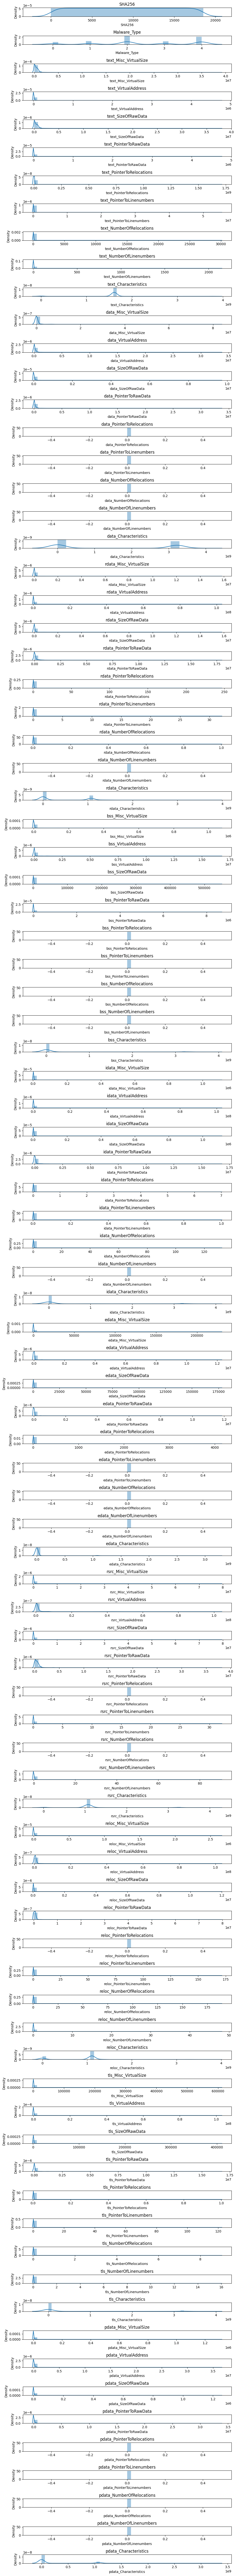

In [ ]:
plt.figure(figsize=(10, 108))
for i, column in enumerate(df.columns):
    plt.subplot(92, 1, i+1)
    sns.distplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

* Most of the data is Right-Skewed.*

**Checking if there are outliers:**

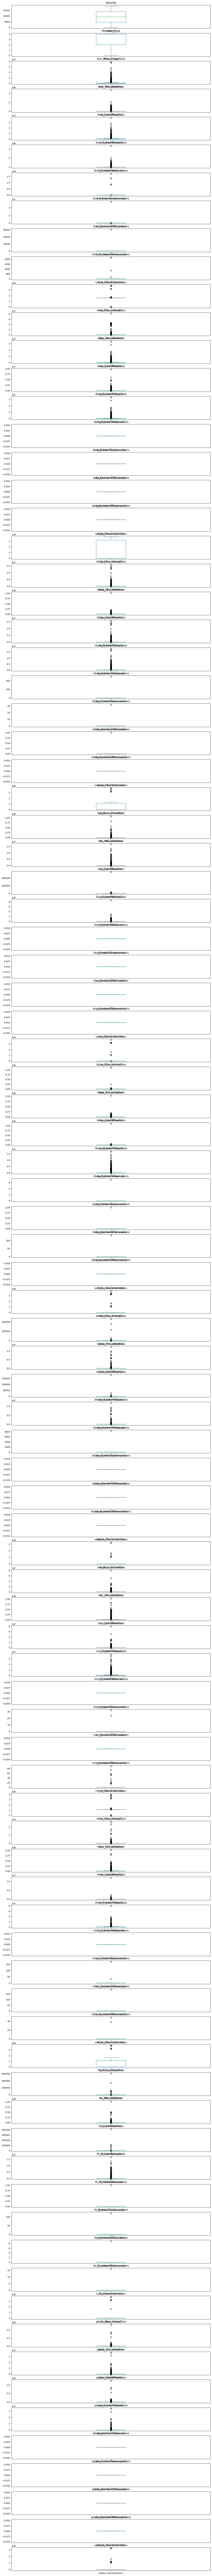

In [ ]:
plt.figure(figsize=(16, 208))
for i, column in enumerate(df.columns):
    plt.subplot(92, 1, i+1)
    df[column].plot.box(figsize=(16,208))
    plt.title(column)

plt.show()

*I am unable to get much information about the outliers from this graph. Since there are no whiskers, so it suggests that the values are concentrated over a value which is true if we take a look on the dataset. However there is a point which is way far from the others. I will try to verify that using scatter plot*

**Checking the outliers again using scatter plot:**

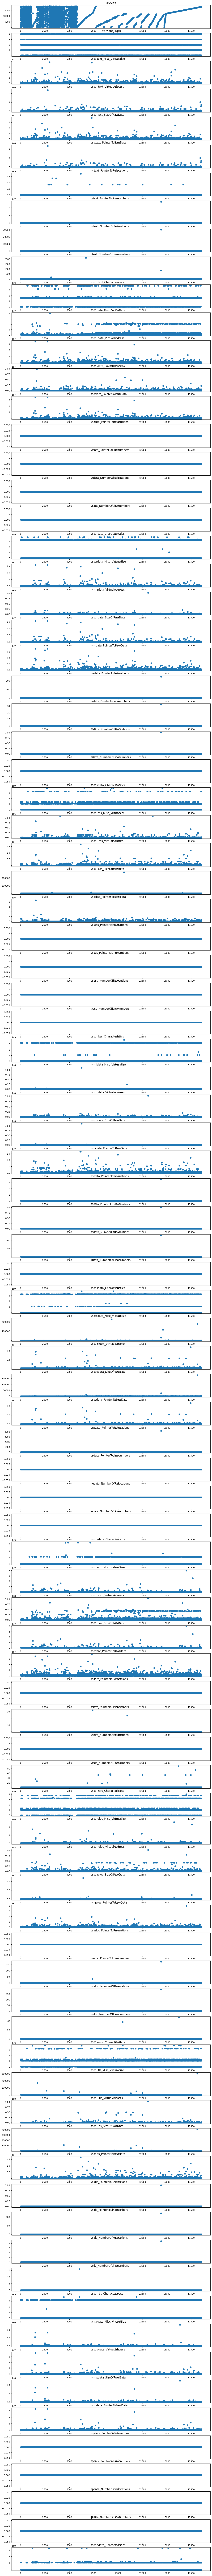

In [ ]:
X = range(len(df))
plt.figure(figsize=(16, 208))
for i, column in enumerate(df.columns):
   Y = df[column]
   plt.subplot(92, 1, i+1)
   plt.scatter(X,Y)
   plt.title(column)

plt.show()

**Calculating the z-score to further understand the distribution of the points and understand the outliers:**

In [ ]:
z_scores = df.apply(zscore)
min_z_scores = z_scores.min()
max_z_scores = z_scores.max()
for column in df.columns:
    print(f"Column: {column}")
    print(f"Minimum z-score: {min_z_scores[column]}")
    print(f"Maximum z-score: {max_z_scores[column]}")
    print()

Column: SHA256
Minimum z-score: -1.7319574179369344
Maximum z-score: 1.7319574179369344

Column: Malware_Type
Minimum z-score: -1.868364713076251
Maximum z-score: 1.2061626460073676

Column: text_Misc_VirtualSize
Minimum z-score: -0.485788861038512
Maximum z-score: 42.25914018665367

Column: text_VirtualAddress
Minimum z-score: -0.16178727872163495
Maximum z-score: 74.63789080515855

Column: text_SizeOfRawData
Minimum z-score: -0.5257964196689802
Maximum z-score: 45.59239080494911

Column: text_PointerToRawData
Minimum z-score: -0.08052291492935643
Maximum z-score: 76.61434071994074

Column: text_PointerToRelocations
Minimum z-score: -0.030140751436214922
Maximum z-score: 54.18532673698532

Column: text_PointerToLinenumbers
Minimum z-score: -0.007411913836057636
Maximum z-score: 136.17961795211065

Column: text_NumberOfRelocations
Minimum z-score: -0.007343220701226287
Maximum z-score: 136.1800279042415

Column: text_NumberOfLinenumbers
Minimum z-score: -0.012361076739411787
Maximum z-

**Checking if the data is balanced**

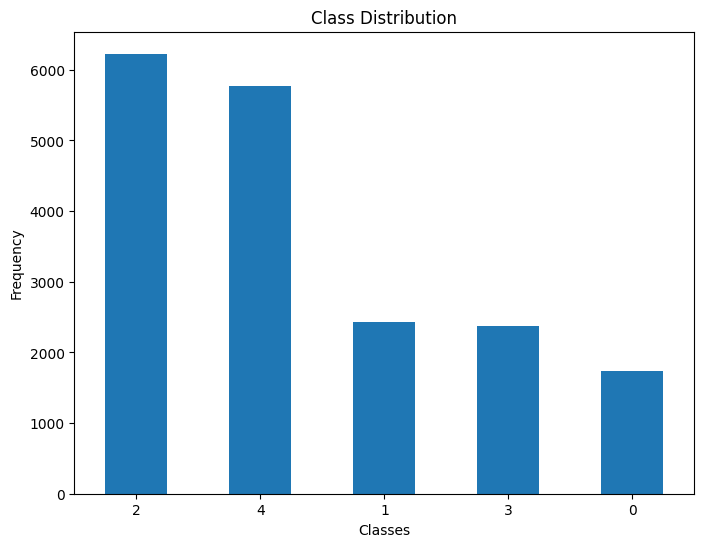

In [ ]:
target_column = 'Malware_Type'
class_frequencies = df[target_column].value_counts()


plt.figure(figsize=(8, 6))
class_frequencies.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

*It also shows that the data is not balanced.*

In [ ]:
X = df.drop('Malware_Type', axis=1)
y = df['Malware_Type']
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)
df_balanced = pd.concat([y_balanced, X_balanced], axis=1)
print(df_balanced)

       Malware_Type  SHA256  text_Misc_VirtualSize  text_VirtualAddress  \
0                 4      72              13.493067             8.318010   
1                 2      73              13.698982             9.011035   
2                 2   17319               9.690604             9.011035   
3                 3    7613               0.000000             0.000000   
4                 4     274              12.234198             8.318010   
...             ...     ...                    ...                  ...   
31135             4    6653              11.453339             8.318010   
31136             4   17390               8.530642             9.011035   
31137             4    2749              14.129493             9.011035   
31138             4   15788              13.177176             9.011035   
31139             4    5927              13.591782             9.011035   

       text_SizeOfRawData  text_PointerToRawData  text_PointerToRelocations  \
0               13.4

**Lets compare the difference after balancing using SMOTE:**

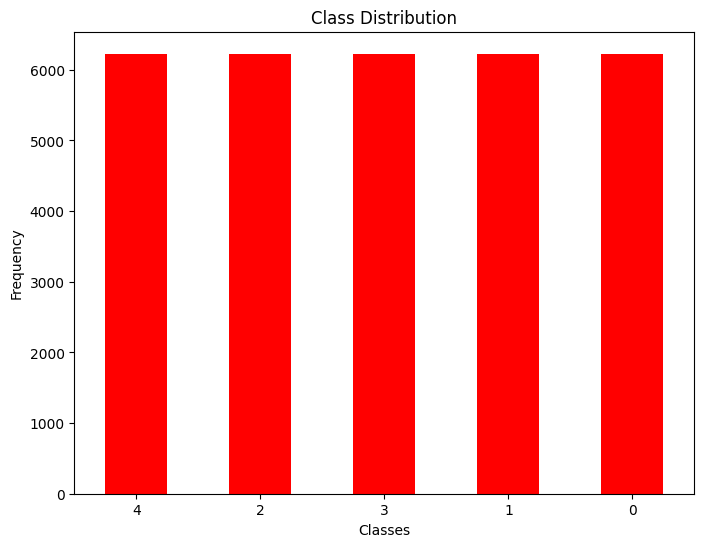

In [ ]:
target_column = 'Malware_Type'
class_frequencies = df_balanced[target_column].value_counts()


plt.figure(figsize=(8, 6))
class_frequencies.plot(kind='bar', color="red")
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

**Solving the skewness using Logarithmic Transformation:**

In [ ]:
column_names = df.columns.tolist()
for column in column_names:
    skewness = df[column].skew()
    if skewness > 1:
        df[column] = np.log(df[column] + 1)

In [ ]:
df.describe()

SHA256  Malware_Type  text_Misc_VirtualSize  text_VirtualAddress  \
count  18546.000000  18546.000000           18546.000000         18546.000000   
mean    9272.500000      2.430767              11.440821             8.191653   
std     5353.913382      1.301048               3.298340             2.141529   
min        0.000000      0.000000               0.000000             0.000000   
25%     4636.250000      2.000000              10.690967             8.318010   
50%     9272.500000      2.000000              12.443091             8.318010   
75%    13908.750000      4.000000              13.366112             9.011035   
max    18545.000000      4.000000              17.475022            15.373942   

       text_SizeOfRawData  text_PointerToRawData  text_PointerToRelocations  \
count        18546.000000           18546.000000               18546.000000   
mean            11.351607               6.304948                   0.020204   
std              3.431161               1.868636                   0.643974   
min              0.000000               0.000000                   0.000000   
25%             10.607797               6.240276                   0.000000   
50%             12.416273               6.932448                   0.000000   
75%             13.357759               6.932448                   0.000000   
max             17.446720              15.370920                  21.255032   

       text_PointerToLinenumbers  text_NumberOfRelocations  \
count               18546.000000              18546.000000   
mean                    0.011510                  0.000556   
std                     0.350136                  0.075710   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  0.000000   
max                    17.828434                 10.310452   

       text_NumberOfLinenumbers  ...  tls_Characteristics  \
count              18546.000000  ...         18546.000000   
mean                   0.001469  ...             1.889975   
std                    0.101119  ...             6.148837   
min                    0.000000  ...             0.000000   
25%                    0.000000  ...             0.000000   
50%                    0.000000  ...             0.000000   
75%                    0.000000  ...             0.000000   
max                    7.669962  ...            22.048015   

       pdata_Misc_VirtualSize  pdata_VirtualAddress  pdata_SizeOfRawData  \
count            18546.000000          18546.000000         18546.000000   
mean                 1.504205              2.100933             1.477488   
std                  3.371623              4.684547             3.353204   
min                  0.000000              0.000000             0.000000   
25%                  0.000000              0.000000             0.000000   
50%                  0.000000              0.000000             0.000000   
75%                  0.000000              0.000000             0.000000   
max                 14.086088             17.412359            14.041352   

       pdata_PointerToRawData  pdata_PointerToRelocations  \
count            18546.000000                     18546.0   
mean                 2.025888                         0.0   
std                  4.586028                         0.0   
min                  0.000000                         0.0   
25%                  0.000000                         0.0   
50%                  0.000000                         0.0   
75%                  0.000000                         0.0   
max                 17.332305                         0.0   

       pdata_PointerToLinenumbers  pdata_NumberOfRelocations  \
count                     18546.0                    18546.0   
mean                          0.0                        0.0   
std                           0.0  

<ipython-input-25-8cd2451c09c5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color='green', label='Original')
<ipython-input-25-8cd2451c09c5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[column], color='red', label='Balanced')
<ipython-input-25-8cd2451c09c5>:4: Us

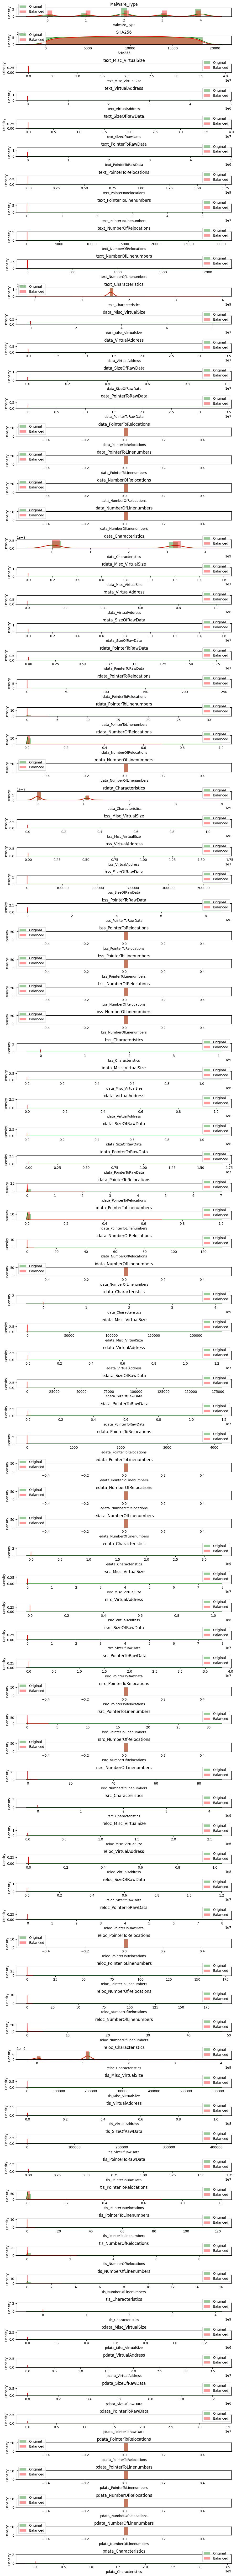

In [ ]:
plt.figure(figsize=(10, 108))
for i, column in enumerate(df_balanced.columns):
    plt.subplot(92, 1, i+1)
    sns.distplot(df[column], color='green', label='Original')
    sns.distplot(df_balanced[column], color='red', label='Balanced')
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()

*There is a slight improvement.*

**Checking the columns having only one unique value:**

In [ ]:
columns_with_single_unique_value = df_balanced.columns[df.nunique() == 1].tolist()
print("Columns with only one unique value:", columns_with_single_unique_value)

Columns with only one unique value: ['data_PointerToRelocations', 'data_PointerToLinenumbers', 'data_NumberOfRelocations', 'data_NumberOfLinenumbers', 'rdata_NumberOfLinenumbers', 'bss_PointerToRelocations', 'bss_PointerToLinenumbers', 'bss_NumberOfRelocations', 'bss_NumberOfLinenumbers', 'idata_NumberOfLinenumbers', 'edata_PointerToLinenumbers', 'edata_NumberOfRelocations', 'edata_NumberOfLinenumbers', 'rsrc_PointerToRelocations', 'rsrc_NumberOfRelocations', 'reloc_PointerToRelocations', 'pdata_PointerToRelocations', 'pdata_PointerToLinenumbers', 'pdata_NumberOfRelocations', 'pdata_NumberOfLinenumbers']


**Dropping the columns having only one unique value because they have no affect on the results:**

In [ ]:
for unique_values in columns_with_single_unique_value:
  df_balanced = df_balanced.drop(unique_values , axis=1)

**Checking the shape of the dataset after the modification:**

In [ ]:
nRow, nCol = df_balanced.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 31140 rows and 72 columns


**Checking "Feature Importance to further check whether to keep or drop other columns:**

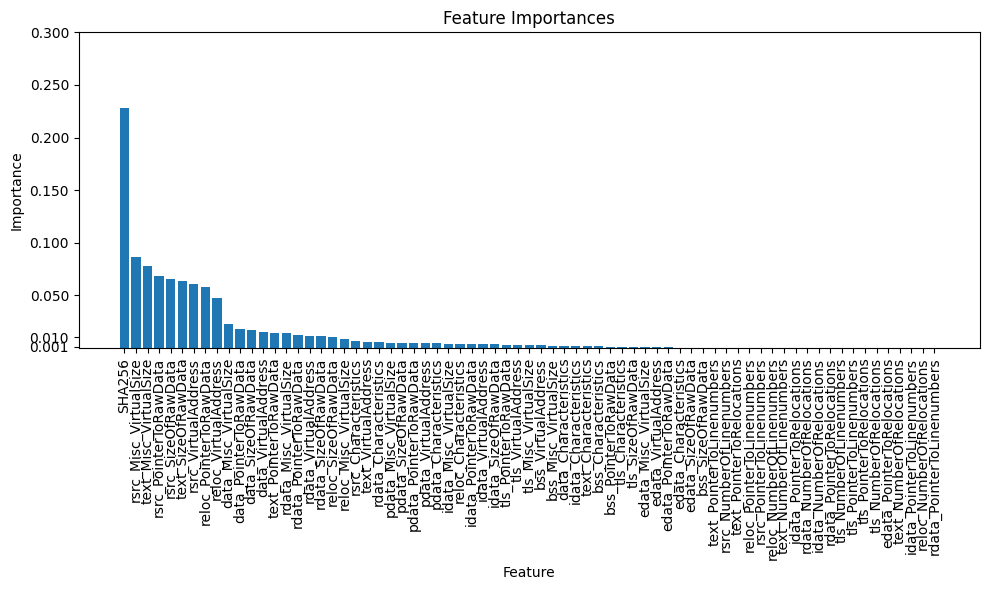

In [ ]:
X = df_balanced.drop('Malware_Type', axis=1)
y = df_balanced['Malware_Type']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.ylim(0, 0.3)
plt.yticks([0.001 , 0.01 , 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
plt.tight_layout()
plt.show()



**Take 0.001 As a Threshold and drop the column below this threshold:**

In [ ]:
columns_to_drop = importance_df[importance_df['Importance'] < 0.001]['Feature']
df_balanced = df_balanced.drop(columns_to_drop, axis=1)

**Check the new Shape  of the dataset:**

In [ ]:
nRow, nCol = df_balanced.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 31140 rows and 46 columns


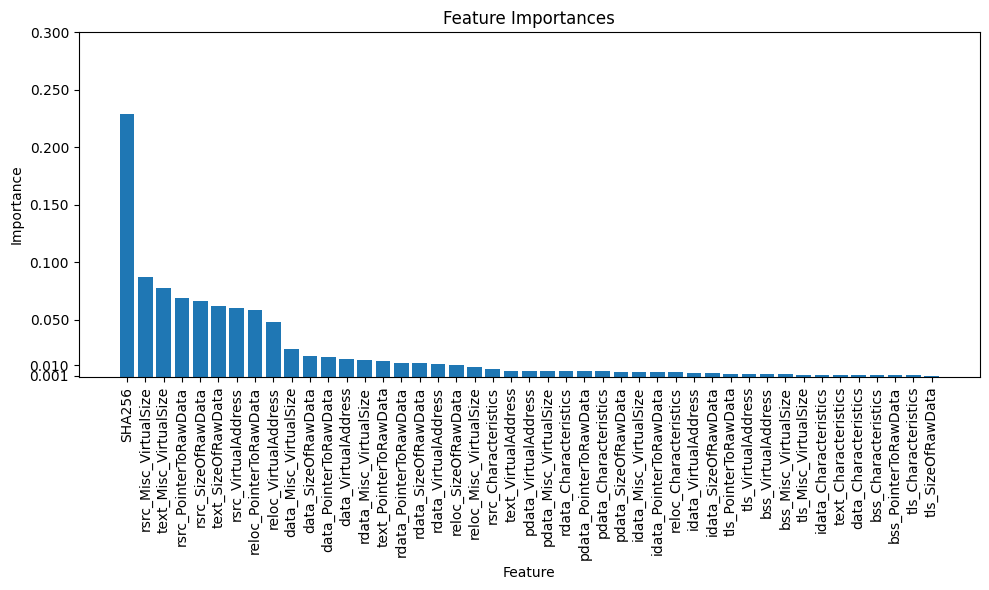

In [ ]:
X = df_balanced.drop('Malware_Type', axis=1)
y = df_balanced['Malware_Type']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.ylim(0, 0.3)
plt.yticks([0.001 , 0.01 , 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
plt.tight_layout()
plt.show()

**Making Normalization:**

In [ ]:
df_balanced = (df_balanced - df_balanced.min()) / (df_balanced.max() - df_balanced.min())

In [ ]:
df_balanced['Malware_Type'].unique()

array([1.  , 0.5 , 0.75, 0.25, 0.  ])

In [ ]:
df_balanced.head()

Malware_Type    SHA256  text_Misc_VirtualSize  text_VirtualAddress  \
0          1.00  0.003882               0.772134             0.541046   
1          0.50  0.003936               0.783918             0.586124   
2          0.50  0.933891               0.554540             0.586124   
3          0.75  0.410515               0.000000             0.000000   
4          1.00  0.014775               0.700096             0.541046   

   text_SizeOfRawData  text_PointerToRawData  text_Characteristics  \
0            0.773395               0.451011              0.426162   
1            0.785213               0.405979              0.424779   
2            0.556215               0.405979              0.424779   
3            0.000000               0.000000              0.000000   
4            0.701265               0.451011              0.424779   

   data_Misc_VirtualSize  data_VirtualAddress  data_SizeOfRawData  ...  \
0                0.63628             0.779106            0.721187  ...   
1                0.00000             0.000000            0.000000  ...   
2                0.00000             0.000000            0.000000  ...   
3                0.00000             0.000000            0.000000  ...   
4                0.66828             0.708088            0.751708  ...   

   reloc_PointerToRawData  reloc_Characteristics  tls_Misc_VirtualSize  \
0                0.000000               0.000000              0.164936   
1                0.753389               0.292035              0.000000   
2                0.643650               0.292035              0.000000   
3                0.575003               0.353982              0.164936   
4                0.000000               0.000000              0.000000   

   tls_VirtualAddress  tls_PointerToRawData  pdata_Misc_VirtualSize  \
0            0.757006              0.838993                     0.0   
1            0.000000              0.000000                     0.0   
2            0.000000              0.000000                     0.0   
3            0.618521              0.628100                     0.0   
4            0.000000              0.000000                     0.0   

   pdata_VirtualAddress  pdata_SizeOfRawData  pdata_PointerToRawData  \
0                   0.0                  0.0                     0.0   
1                   0.0                  0.0                     0.0   
2                   0.0                  0.0                     0.0   
3                   0.0                  0.0                     0.0   
4                   0.0                  0.0                     0.0   

   pdata_Characteristics  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 41 columns]

# **Model Creation:**

**Splitting the dataset:**

In [ ]:
X = df_balanced.drop('Malware_Type', axis=1)
y = df_balanced['Malware_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_unique = len(y.unique())

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (24912, 45)
X_test shape: (6228, 45)


**LSTM:**

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np_utils.to_categorical(y_train, num_unique)
y_test = np_utils.to_categorical(y_test, num_unique)

n_features = X_train.shape[1]
n_timesteps = 1
X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))


model = Sequential()
model.add(LSTM(64, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(num_unique, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                28160     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 28,485
Trainable params: 28,485
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
623/623 [==============================] - 50s 5ms/step - loss: 0.6442 - accuracy: 0.7933 - precision_2: 0.7974 - recall_2: 0.6952 - val_loss: 0.5017 - val_accuracy: 0.8009 - val_precision_2: 0.8009 - val_recall_2: 0.8009
Epoch 2/10
623/623 [==============================] - 4s 6ms/step - loss: 0.5013 - accuracy: 0.7992 - precision_2: 0.7992 - recall_2: 0.7992 - val_loss: 0.4939 - val_accuracy: 0.8009 - val_precision_2: 0.8009 - val_recall_2: 0.8009
Epoch 3/10
623/623 [==============================] - 4s 6ms/step - loss: 0.4978 - accuracy: 0.7991 - precision_2: 0.7991 - recall_2: 0.7991 - val_loss: 0.4911 - val_accuracy: 0.8009 - val_precision_2: 0.8009 - val_recall_2: 0.8009
Epoch 4/10
623/623 [==============================] - 2s 4ms/step - loss: 0.4968 - accuracy: 0.7990 - precision_2: 0.7990 - recall_2: 0.7990 - val_loss: 0.4900 - val_accuracy: 0.8009 - val_precision_2: 0.8009 - val_recall_2: 0.8009
Epoch 5/10
623/623 [==============================] - 2s 4ms/step - los

In [ ]:
#model.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
 history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
623/623 [==============================] - 7s 11ms/step - loss: 0.4696 - accuracy: 0.8038 - precision: 0.8038 - recall: 0.8038 - val_loss: 0.4708 - val_accuracy: 0.8069 - val_precision: 0.8069 - val_recall: 0.8069
Epoch 2/50
623/623 [==============================] - 12s 20ms/step - loss: 0.4687 - accuracy: 0.8052 - precision: 0.8052 - recall: 0.8052 - val_loss: 0.4686 - val_accuracy: 0.8063 - val_precision: 0.8063 - val_recall: 0.8063
Epoch 3/50
623/623 [==============================] - 11s 17ms/step - loss: 0.4692 - accuracy: 0.8063 - precision: 0.8063 - recall: 0.8063 - val_loss: 0.4683 - val_accuracy: 0.8071 - val_precision: 0.8071 - val_recall: 0.8071
Epoch 4/50
623/623 [==============================] - 4s 6ms/step - loss: 0.4688 - accuracy: 0.8056 - precision: 0.8056 - recall: 0.8056 - val_loss: 0.4689 - val_accuracy: 0.8059 - val_precision: 0.8059 - val_recall: 0.8059
Epoch 5/50
623/623 [==============================] - 4s 7ms/step - loss: 0.4694 - accuracy: 0.8057

In [ ]:
 history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/100
312/312 [==============================] - 1s 4ms/step - loss: 0.4797 - accuracy: 0.8047 - precision: 0.8047 - recall: 0.8047 - val_loss: 0.4811 - val_accuracy: 0.8065 - val_precision: 0.8065 - val_recall: 0.8065
Epoch 2/100
312/312 [==============================] - 1s 5ms/step - loss: 0.4791 - accuracy: 0.8046 - precision: 0.8046 - recall: 0.8046 - val_loss: 0.4802 - val_accuracy: 0.8059 - val_precision: 0.8059 - val_recall: 0.8059
Epoch 3/100
312/312 [==============================] - 1s 4ms/step - loss: 0.4790 - accuracy: 0.8048 - precision: 0.8048 - recall: 0.8048 - val_loss: 0.4803 - val_accuracy: 0.8063 - val_precision: 0.8063 - val_recall: 0.8063
Epoch 4/100
312/312 [==============================] - 1s 4ms/step - loss: 0.4785 - accuracy: 0.8044 - precision: 0.8044 - recall: 0.8044 - val_loss: 0.4804 - val_accuracy: 0.8060 - val_precision: 0.8060 - val_recall: 0.8060
Epoch 5/100
312/312 [==============================] - 1s 4ms/step - loss: 0.4793 - accuracy: 0.8047

objective problem statement proposed method block diagram result STEPS

CHECK THE PREV ARTICLES

**Bidirectional LSTM**

In [ ]:

X = df_balanced.drop('Malware_Type', axis=1)
y = df_balanced['Malware_Type']


num_unique = len(y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.array(X_train)
X_test = np.array(X_test)


n_features = X_train.shape[1]
n_timesteps = 1
X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(n_timesteps, n_features)))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(TimeDistributed(Dense(num_unique, activation='softmax')))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 128)           54272     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 1, 64)            8256      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 5)             325       
 tributed)                                                       
                                                                 
Total params: 62,853
Trainable params: 62,853
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
779/779 [==============================] - 4s 6ms/step - loss: 0.4946 - accuracy: 0.2016
Epoch 2/10
779/779 [==============================] - 4s 5ms/step - loss: 0.4931 - accuracy: 0.2017
Epoch 3/10
779/779 [==============================] - 4s 5ms/step - loss: 0.4929 - accuracy: 0.2017
Epoch 4/10
779/779 [==============================] - 4s 5ms/step - loss: 0.4915 - accuracy: 0.2017
Epoch 5/10
779/779 [==============================] - 4s 6ms/step - loss: 0.4919 - accuracy: 0.2018
Epoch 6/10
779/779 [==============================] - 4s 5ms/step - loss: 0.4911 - accuracy: 0.2020
Epoch 7/10
779/779 [==============================] - 3s 4ms/step - loss: 0.4902 - accuracy: 0.2020
Epoch 8/10
779/779 [==============================] - 5s 6ms/step - loss: 0.4893 - accuracy: 0.2034
Epoch 9/10
779/779 [==============================] - 3s 4ms/step - loss: 0.4884 - accuracy: 0.2058
Epoch 10/10
779/779 [==============================] - 4s 5ms/step - loss: 0.4877 - accuracy: 0.2060

In [ ]:
"""
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

**Logistic Regression**

In [ ]:



X = df_balanced.drop('Malware_Type', axis=1)
y = df_balanced['Malware_Type']
label_encoder = LabelEncoder()


y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2580282594733462


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest**

In [ ]:


X = df_balanced.drop('Malware_Type', axis=1)
y = df_balanced['Malware_Type']
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5052986512524085


In [ ]:

X = df.drop('Malware_Type', axis=1)
y = df['Malware_Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm = SVC(kernel='rbf')


svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.35983827493261455


In [ ]:

X = df.drop('Malware_Type', axis=1)
y = df['Malware_Type']

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
timesteps = 1
X_train = X_train.values.reshape(-1, timesteps, n_features)
X_test = X_test.values.reshape(-1, timesteps, n_features)


model = Sequential()
model.add(SimpleRNN(64, input_shape=(timesteps, n_features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                9984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 12,229
Trainable params: 12,229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import GRU




X = df.drop('Malware_Type', axis=1)
y = df['Malware_Type']

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
timesteps = 1
X_train = X_train.values.reshape(-1, timesteps, n_features)
X_test = X_test.values.reshape(-1, timesteps, n_features)


model = Sequential()
model.add(GRU(64, input_shape=(timesteps, n_features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                30144     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 32,389
Trainable params: 32,389
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
464/464 [==============================] - 4s 4ms/step - loss: 1.4717 - accuracy: 0.3707
Epoch 2/10
464/464 [==============================] - 2s 3ms/step - loss: 1.4570 - accuracy: 0.3723
Epoch 3/10
464/464 [==============================] - 2s 3ms/step - loss: 1.4557 - accuracy: 0.3756
Epoch 4/10
464/464 [==============================] - 2s 3ms/step - loss: 1.4542 - accuracy: 0.3723
Epoch 5/10
464/464 [==============================] - 2s 4ms/step - loss: 1.4542 - accuracy: 0.3783
Epoch 6/10
464/464 [==============================] - 2s 4ms/step - loss: 1.4529 - accuracy: 0.3793
Epoch 7/10
464/464 [==============================] - 2s 4ms/step - loss: 1.4531 - accuracy: 0.3779
Epoch 8/10
464/464 [==============================] - 2s 4ms/step - loss: 1.4527 - accuracy: 0.3753
Epoch 9/10
464/464 [==============================] - 2s 4ms/step - loss: 1.4517 - accuracy: 0.3758
Epoch 10/10
464/464 [==============================] - 2s 5ms/step - loss: 1.4511 - accuracy: 0.3773

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
464/464 [==============================] - 6s 6ms/step - loss: 1.4701 - accuracy: 0.3705
Epoch 2/10
464/464 [==============================] - 2s 5ms/step - loss: 1.4526 - accuracy: 0.3746
Epoch 3/10
464/464 [==============================] - 2s 5ms/step - loss: 1.4523 - accuracy: 0.3756
Epoch 4/10
464/464 [==============================] - 2s 5ms/step - loss: 1.4516 - accuracy: 0.3733
Epoch 5/10
464/464 [==============================] - 2s 5ms/step - loss: 1.4509 - accuracy: 0.3773
Epoch 6/10
464/464 [==============================] - 3s 6ms/step - loss: 1.4508 - accuracy: 0.3781
Epoch 7/10
464/464 [==============================] - 3s 6ms/step - loss: 1.4498 - accuracy: 0.3787
Epoch 8/10
464/464 [==============================] - 3s 6ms/step - loss: 1.4502 - accuracy: 0.3755
Epoch 9/10
464/464 [==============================] - 2s 5ms/step - loss: 1.4502 - accuracy: 0.3754
Epoch 10/10
464/464 [==============================] - 2s 5ms/step - loss: 1.4503 - accuracy: 0.3780

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

#Reshape
X_train = X_train.reshape(-1, n_features, 1)
X_test = X_test.reshape(-1, n_features, 1)


model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 89, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 87, 64)            6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 43, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2752)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                176192    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
116/116 [==============================] - 4s 24ms/step - loss: 5985768.5000 - accuracy: 0.2592
Epoch 2/10
116/116 [==============================] - 4s 35ms/step - loss: 2864031.7500 - accuracy: 0.2633
Epoch 3/10
116/116 [==============================] - 3s 24ms/step - loss: 1869541.3750 - accuracy: 0.2674
Epoch 4/10
116/116 [==============================] - 3s 23ms/step - loss: 1253254.5000 - accuracy: 0.2584
Epoch 5/10
116/116 [==============================] - 3s 24ms/step - loss: 908123.0000 - accuracy: 0.2659
Epoch 6/10
116/116 [==============================] - 3s 29ms/step - loss: 716650.6875 - accuracy: 0.2730
Epoch 7/10
116/116 [==============================] - 3s 29ms/step - loss: 545642.6250 - accuracy: 0.2635
Epoch 8/10
116/116 [==============================] - 3s 23ms/step - loss: 473111.2188 - accuracy: 0.2640
Epoch 9/10
116/116 [==============================] - 3s 23ms/step - loss: 401118.2500 - accuracy: 0.2694
Epoch 10/10
116/116 [=====================

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_2', 'recall_2', 'val_loss', 'val_accuracy', 'val_precision_2', 'val_recall_2'])

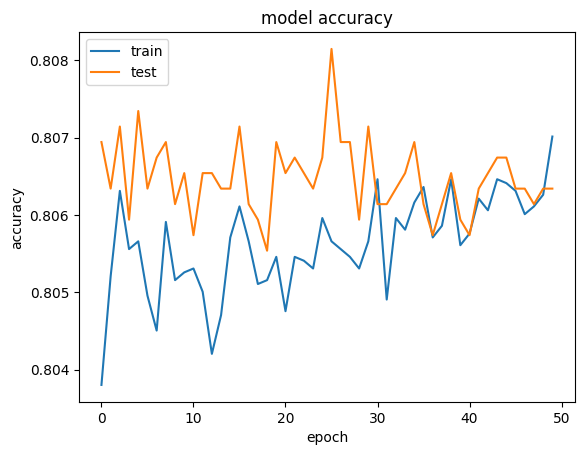

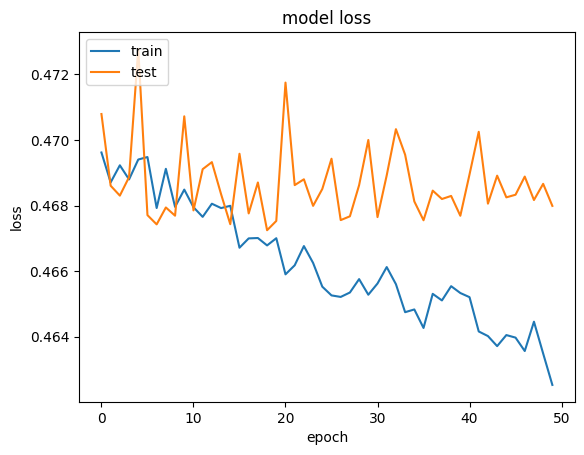

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

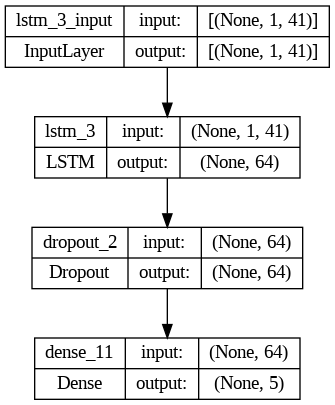

In [ ]:
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
y_pred = model.predict(X_test)

195/195 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([[7.8379714e-01, 2.1620166e-01, 3.4858283e-07, 3.3891430e-07,
        3.9079657e-07],
       [6.7906940e-01, 3.2093027e-01, 6.6895481e-08, 6.6589834e-08,
        7.3179415e-08],
       [8.3006567e-01, 1.6993418e-01, 1.2942936e-08, 1.2442828e-08,
        1.4182860e-08],
       ...,
       [6.9425559e-01, 3.0574432e-01, 3.9225114e-08, 3.8831178e-08,
        4.2625835e-08],
       [8.5914677e-01, 1.4085320e-01, 2.8503047e-08, 2.7347244e-08,
        3.0546197e-08],
       [7.4915403e-01, 2.5084457e-01, 4.6549616e-07, 4.6099879e-07,
        5.3508376e-07]], dtype=float32)

In [ ]:

def metrics_computation(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision= precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)

    f1=2*((precision*recall)/(precision+recall+K.epsilon()))

    return f1, precision, recall

In [ ]:
f1, precision, recall = metrics_computation(y_pred,y_test )
print("Recall: ", recall.numpy())
print("Precision: ", precision.numpy())
print("f1-score: ", f1.numpy())

Recall:  0.8045922
Precision:  0.8045922
f1-score:  0.80459213


In [ ]:
model.save("model.h5")